In [1]:
import networkx as nx
import numpy as np
import scipy.stats
from tqdm.notebook import tqdm
import collections
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
import math
from math import comb

In [2]:
# Using readlines()
file1 = open('../../datasets/CollegeMsg.txt', 'r')
#file1 = open('../../datasets/email-Eu-core-temporal.txt','r')
Lines = file1.readlines()

G = nx.MultiDiGraph()

count = 0
for line in tqdm(Lines):
    count += 1
    myLine = line.split(',')
    if myLine[0] not in G:
        G.add_node(myLine[0],falsePos=1)
    if myLine[1] not in G:
        G.add_node(myLine[1],falsePos=1)
    G.add_edge(myLine[0],myLine[1], weight=myLine[2])
print("There were",count,"lines in the file!")

  0%|          | 0/59835 [00:00<?, ?it/s]

There were 59835 lines in the file!


In [6]:
print("Number of nodes : ", G.order())
print("Number of edges: ", G.size())
print("Density of the transaction graph: ",nx.classes.function.density(G))

Number of nodes :  1899
Number of edges:  59835
Density of the transaction graph:  0.016600995144136092


In [4]:
noMsgsPerNodes = []
for u in G.nodes:
    for v in G.nodes:
        if u!=v and G.number_of_edges(u,v)!=0:
            noMsgsPerNodes.append(G.number_of_edges(u,v))
print(noMsgsPerNodes)          

[1, 32, 4, 1, 12, 4, 5, 1, 2, 4, 2, 4, 2, 5, 5, 3, 1, 3, 58, 1, 1, 13, 2, 1, 3, 8, 1, 2, 16, 1, 3, 1, 1, 35, 7, 1, 1, 4, 1, 19, 9, 2, 4, 5, 7, 1, 1, 1, 3, 7, 1, 3, 1, 1, 1, 5, 8, 1, 2, 4, 1, 1, 3, 2, 1, 2, 1, 2, 1, 2, 2, 1, 7, 2, 2, 2, 1, 1, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 4, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 5, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 4, 1, 1, 4, 2, 2, 2, 1, 2, 1, 1, 2, 11, 2, 13, 5, 1, 1, 3, 7, 1, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 13, 5, 1, 1, 1, 1, 2, 1, 6, 1, 1, 8, 1, 1, 3, 2, 2, 3, 2, 1, 1, 1, 1, 1, 1, 4, 2, 4, 3, 1, 1, 3, 1, 2, 1, 56, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 4, 25, 3, 1, 1, 3, 2, 6, 2, 1, 1, 11, 3, 1, 1, 1, 10, 1, 5, 1, 1, 4, 1, 5, 1, 10, 4, 1, 1, 1, 1, 1, 1, 1, 

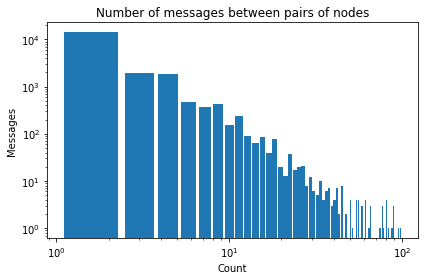

In [5]:
plt.hist(noMsgsPerNodes, bins=len(set(noMsgsPerNodes)), rwidth = 0.85)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Count')
plt.ylabel('Messages')
plt.title('Number of messages between pairs of nodes')
plt.tight_layout()
plt.savefig("messagesBetweenPairsCollege.pdf")
plt.show()

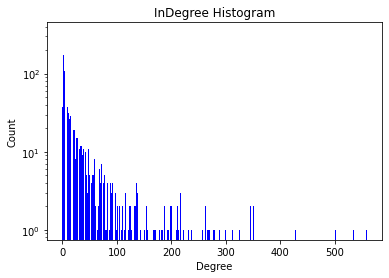

In [221]:
degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.bar(deg, cnt, color="b")

plt.title("InDegree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.yscale('log')
plt.show()

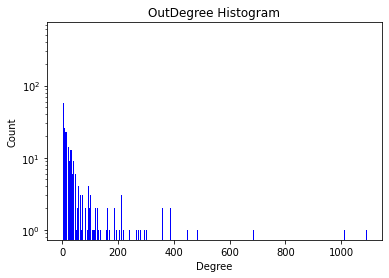

In [222]:
degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.bar(deg, cnt, color="b")

plt.title("OutDegree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.yscale('log')
plt.show()

In [47]:
entropies = np.zeros((10,20))
entropy = np.zeros((20))
for p in range(1,10):
    for M in range(20):
        onemp=1-math.pow(2,-p)
        ent = max(0,1/2*(1+math.log2(3.1415925)+math.log2(2.71828)+M-p+math.log2(onemp)))
        entropy[M]=ent
    entropies[p]=entropy
entropies = entropies[1:]
print(entropies)

[[1.04709506e+00 1.54709506e+00 2.04709506e+00 2.54709506e+00
  3.04709506e+00 3.54709506e+00 4.04709506e+00 4.54709506e+00
  5.04709506e+00 5.54709506e+00 6.04709506e+00 6.54709506e+00
  7.04709506e+00 7.54709506e+00 8.04709506e+00 8.54709506e+00
  9.04709506e+00 9.54709506e+00 1.00470951e+01 1.05470951e+01]
 [8.39576315e-01 1.33957632e+00 1.83957632e+00 2.33957632e+00
  2.83957632e+00 3.33957632e+00 3.83957632e+00 4.33957632e+00
  4.83957632e+00 5.33957632e+00 5.83957632e+00 6.33957632e+00
  6.83957632e+00 7.33957632e+00 7.83957632e+00 8.33957632e+00
  8.83957632e+00 9.33957632e+00 9.83957632e+00 1.03395763e+01]
 [4.50772526e-01 9.50772526e-01 1.45077253e+00 1.95077253e+00
  2.45077253e+00 2.95077253e+00 3.45077253e+00 3.95077253e+00
  4.45077253e+00 4.95077253e+00 5.45077253e+00 5.95077253e+00
  6.45077253e+00 6.95077253e+00 7.45077253e+00 7.95077253e+00
  8.45077253e+00 8.95077253e+00 9.45077253e+00 9.95077253e+00]
 [5.40362502e-04 5.00540363e-01 1.00054036e+00 1.50054036e+00
  2.0

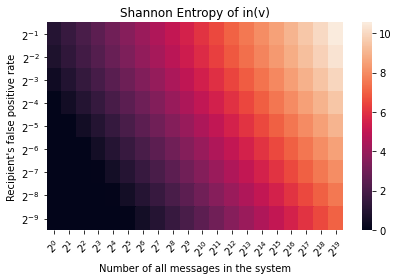

In [51]:
#x_axis_labels = [2**i for i in range(0,20)]
x_axis_labels = ["$2^0$","$2^1$","$2^2$","$2^3$","$2^4$","$2^5$","$2^6$","$2^7$","$2^8$","$2^9$","$2^{10}$",
                 "$2^{11}$","$2^{12}$","$2^{13}$","$2^{14}$","$2^{15}$","$2^{16}$","$2^{17}$","$2^{18}$","$2^{19}$"]
#y_axis_labels = [math.pow(2,-(i)) for i in range(1,10)]
y_axis_labels = ["$2^{-1}$","$2^{-2}$","$2^{-3}$","$2^{-4}$","$2^{-5}$","$2^{-6}$","$2^{-7}$","$2^{-8}$","$2^{-9}$"]
ax = sns.heatmap(entropies, xticklabels=x_axis_labels, yticklabels = y_axis_labels)
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
ax.set_title('Shannon Entropy of in(v)')
plt.xlabel("Number of all messages in the system")
plt.ylabel("Recipient's false positive rate")
plt.tight_layout()
plt.savefig("incomingMsgEntropy.pdf")
plt.show()

In [21]:
noOfSentMsgs=20
minFalsePositiveRate = 10
allProbs = np.zeros((minFalsePositiveRate,noOfSentMsgs-1))
probability = np.zeros((noOfSentMsgs-1))
for p in range(1,minFalsePositiveRate):
    for k in range(0,noOfSentMsgs-1):
        prob = math.comb(noOfSentMsgs,k)*(2**(-(p*k)))*(1-2**(-p))**(noOfSentMsgs-k)
        probability[k]=max(1-prob,0)
        print(p,k,prob)
    break
    allProbs[p]=probability
allProbs = allProbs[1:]
print(allProbs)

1 0 9.5367431640625e-07
1 1 1.9073486328125e-05
1 2 0.0001811981201171875
1 3 0.001087188720703125
1 4 0.004620552062988281
1 5 0.0147857666015625
1 6 0.03696441650390625
1 7 0.0739288330078125
1 8 0.12013435363769531
1 9 0.16017913818359375
1 10 0.17619705200195312
1 11 0.16017913818359375
1 12 0.12013435363769531
1 13 0.0739288330078125
1 14 0.03696441650390625
1 15 0.0147857666015625
1 16 0.004620552062988281
1 17 0.001087188720703125
1 18 0.0001811981201171875
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

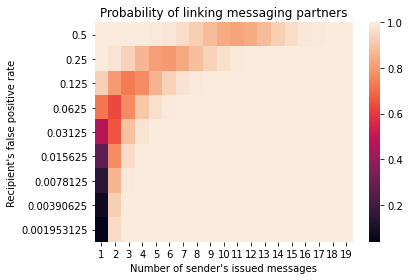

In [20]:
x_axis_labels = [i+1 for i in range(0,19)]
y_axis_labels = [math.pow(2,-(i)) for i in range(1,10)]
ax = sns.heatmap(allProbs, xticklabels=x_axis_labels, yticklabels = y_axis_labels)
ax.set_title('Probability of linking messaging partners')
plt.xlabel("Number of sender's issued messages")
plt.ylabel("Recipient's false positive rate")
plt.tight_layout()
plt.savefig("probabilityOfRecurrent1.pdf")
plt.show()

In [3]:
## Sender unlinkability advantage
noOfUsers=20
minFalsePositiveRate = 10
allProbs = np.zeros((minFalsePositiveRate,noOfUsers-1)) #advantage of the sender unlinkability adversary
probability = np.zeros((noOfUsers-1))
for p in range(1,minFalsePositiveRate):
    for k in range(0,noOfUsers-1):
        allUsers = 2**k
        usersInAnonSet = math.floor(2**(-p+k))
        print(p,k,allUsers,usersInAnonSet)
        prob = np.float64(1.0)
        for l in range(1,usersInAnonSet+1):
            prob *= (allUsers-usersInAnonSet-l)
            prob /= allUsers
        if usersInAnonSet==0:
            prob = 1
        probability[k]=0.5*prob
    allProbs[p]=probability
allProbs = allProbs[1:]
print(allProbs)

1 0 1 0
1 1 2 1
1 2 4 2
1 3 8 4
1 4 16 8
1 5 32 16
1 6 64 32
1 7 128 64
1 8 256 128
1 9 512 256
1 10 1024 512
1 11 2048 1024
1 12 4096 2048
1 13 8192 4096
1 14 16384 8192
1 15 32768 16384
1 16 65536 32768
1 17 131072 65536
1 18 262144 131072
2 0 1 0
2 1 2 0
2 2 4 1
2 3 8 2
2 4 16 4
2 5 32 8
2 6 64 16
2 7 128 32
2 8 256 64
2 9 512 128
2 10 1024 256
2 11 2048 512
2 12 4096 1024
2 13 8192 2048
2 14 16384 4096
2 15 32768 8192
2 16 65536 16384
2 17 131072 32768
2 18 262144 65536
3 0 1 0
3 1 2 0
3 2 4 0
3 3 8 1
3 4 16 2
3 5 32 4
3 6 64 8
3 7 128 16
3 8 256 32
3 9 512 64
3 10 1024 128
3 11 2048 256
3 12 4096 512
3 13 8192 1024
3 14 16384 2048
3 15 32768 4096
3 16 65536 8192
3 17 131072 16384
3 18 262144 32768
4 0 1 0
4 1 2 0
4 2 4 0
4 3 8 0
4 4 16 1
4 5 32 2
4 6 64 4
4 7 128 8
4 8 256 16
4 9 512 32
4 10 1024 64
4 11 2048 128
4 12 4096 256
4 13 8192 512
4 14 16384 1024
4 15 32768 2048
4 16 65536 4096
4 17 131072 8192
4 18 262144 16384
5 0 1 0
5 1 2 0
5 2 4 0
5 3 8 0
5 4 16 0
5 5 32 1
5 6 64 2


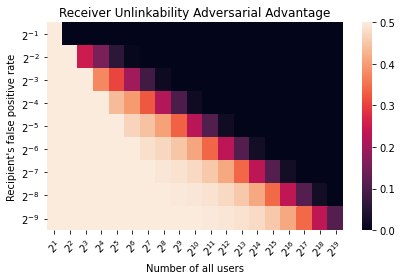

In [6]:
x_axis_labels = ["$2^1$","$2^2$","$2^3$","$2^4$","$2^5$","$2^6$","$2^7$","$2^8$","$2^9$","$2^{10}$",
                 "$2^{11}$","$2^{12}$","$2^{13}$","$2^{14}$","$2^{15}$","$2^{16}$","$2^{17}$","$2^{18}$","$2^{19}$"]
##x_axis_labels = [2**(i+1) for i in range(0,19)]
#y_axis_labels = [math.pow(2,-(i)) for i in range(1,10)]
y_axis_labels = ["$2^{-1}$","$2^{-2}$","$2^{-3}$","$2^{-4}$","$2^{-5}$","$2^{-6}$","$2^{-7}$","$2^{-8}$","$2^{-9}$"]
ax = sns.heatmap(allProbs, xticklabels=x_axis_labels, yticklabels = y_axis_labels)
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
ax.set_title('Receiver Unlinkability Adversarial Advantage')
plt.xlabel("Number of all users")
plt.ylabel("Recipient's false positive rate")
plt.tight_layout()
plt.savefig("receiverUnlinkability.pdf")
plt.show()

In [128]:
## Relationship Anonymity
noOfSentMessages=[100,250,500,1000,2500,5000,10000] ##out(s) in the paper
incomingMsgsFromS = [1,5,10,15,20,25,50,75] ##tag_s(v) in the paper
falsePositives = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
detectableMsgs = np.zeros((len(noOfSentMessages),len(falsePositives)))
for p in falsePositives:
    for allSent in noOfSentMessages:
        for incomingFromS in incomingMsgsFromS:
            mu0 = allSent*p ##the expected number of links in the "cover" graph
            X = (allSent-incomingFromS)*p + incomingFromS
            s = math.sqrt(p*(1-p)*allSent)
            z = (X-mu0)/(float)(s) ##Z-score
            p_values = scipy.stats.norm.sf(abs(z))*2 #twosided
            if p_values < 0.01:
                detectableMsgs[noOfSentMessages.index(allSent)][falsePositives.index(p)] = int(incomingFromS)
                print("DETECTABLE",p,allSent,incomingFromS)
                break
print(detectableMsgs)

DETECTABLE 0.1 100 10
DETECTABLE 0.1 250 15
DETECTABLE 0.1 500 20
DETECTABLE 0.1 1000 50
DETECTABLE 0.1 2500 50
DETECTABLE 0.1 5000 75
DETECTABLE 0.2 100 15
DETECTABLE 0.2 250 25
DETECTABLE 0.2 500 50
DETECTABLE 0.2 1000 50
DETECTABLE 0.2 2500 75
DETECTABLE 0.3 100 20
DETECTABLE 0.3 250 50
DETECTABLE 0.3 500 50
DETECTABLE 0.3 1000 75
DETECTABLE 0.4 100 25
DETECTABLE 0.4 250 50
DETECTABLE 0.4 500 50
DETECTABLE 0.4 1000 75
DETECTABLE 0.5 100 50
DETECTABLE 0.5 250 50
DETECTABLE 0.5 500 75
DETECTABLE 0.6 100 50
DETECTABLE 0.6 250 50
DETECTABLE 0.6 500 75
DETECTABLE 0.7 100 50
DETECTABLE 0.7 250 75
DETECTABLE 0.8 100 75
[[10. 15. 20. 25. 50. 50. 50. 75.  0.]
 [15. 25. 50. 50. 50. 50. 75.  0.  0.]
 [20. 50. 50. 50. 75. 75.  0.  0.  0.]
 [50. 50. 75. 75.  0.  0.  0.  0.  0.]
 [50. 75.  0.  0.  0.  0.  0.  0.  0.]
 [75.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]


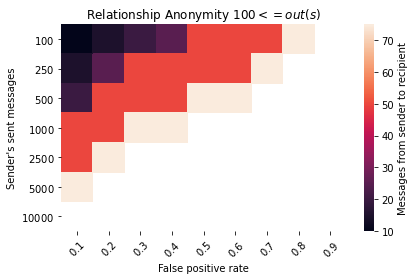

In [129]:
y_axis_labels = ["$10000$","$5000$","$2500$","$1000$","$500$","$250$","$100$"]
y_axis_labels.reverse()
##x_axis_labels = [2**(i+1) for i in range(0,19)]
#y_axis_labels = [math.pow(2,-(i)) for i in range(1,10)]
x_axis_labels = ["$0.1$", "$0.2$", "$0.3$", "$0.4$", "$0.5$", "$0.6$", "$0.7$", "$0.8$", "$0.9$"]
ax = sns.heatmap(detectableMsgs, mask=detectableMsgs < 1,xticklabels=x_axis_labels, yticklabels = y_axis_labels,  cbar_kws={'label': 'Messages from sender to recipient'})
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
ax.set_title('Relationship Anonymity $100 <= out(s)$')
plt.xlabel("False positive rate")
plt.ylabel("Sender's sent messages")
plt.tight_layout()
plt.savefig("relationshipAnonymity.pdf")
plt.show()

In [126]:
## Relationship Anonymity vol. 2.
noOfSentMessages=[10,15,20,25,30] ##out(s) in the paper
incomingMsgsFromS = [1,3,5,7,10] ##tag_s(v) in the paper
falsePositives = [0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9]
detectableMsgs = np.zeros((len(noOfSentMessages),len(falsePositives))) #advantage of the sender unlinkability adversary
for p in falsePositives:
    for allSent in noOfSentMessages:
        for incomingFromS in incomingMsgsFromS:
            mu0 = allSent*p
            X = (allSent-incomingFromS)*p + incomingFromS
            s = math.sqrt(p*(1-p)*allSent)
            t = (X-mu0)/(float)(s) ##t-score
            p_values = scipy.stats.t.sf(np.abs(t), allSent-1)*2 #two-sided
            if p_values < 0.01:
                detectableMsgs[noOfSentMessages.index(allSent)][falsePositives.index(p)] = int(incomingFromS)
                print(p,allSent,incomingFromS)
                if incomingFromS!=1:
                    print("DETECTABLE",p,allSent,incomingFromS)
                break
print(detectableMsgs)

0.1 10 5
DETECTABLE 0.1 10 5
0.1 15 5
DETECTABLE 0.1 15 5
0.1 20 5
DETECTABLE 0.1 20 5
0.1 25 5
DETECTABLE 0.1 25 5
0.1 30 7
DETECTABLE 0.1 30 7
0.2 10 7
DETECTABLE 0.2 10 7
0.2 15 7
DETECTABLE 0.2 15 7
0.2 20 7
DETECTABLE 0.2 20 7
0.2 25 7
DETECTABLE 0.2 25 7
0.2 30 10
DETECTABLE 0.2 30 10
0.3 10 7
DETECTABLE 0.3 10 7
0.3 15 10
DETECTABLE 0.3 15 10
0.3 20 10
DETECTABLE 0.3 20 10
0.3 25 10
DETECTABLE 0.3 25 10
0.3 30 10
DETECTABLE 0.3 30 10
0.4 10 10
DETECTABLE 0.4 10 10
0.4 15 10
DETECTABLE 0.4 15 10
[[ 5.  7.  7. 10.  0.  0.  0.  0.  0.]
 [ 5.  7. 10. 10.  0.  0.  0.  0.  0.]
 [ 5.  7. 10.  0.  0.  0.  0.  0.  0.]
 [ 5.  7. 10.  0.  0.  0.  0.  0.  0.]
 [ 7. 10. 10.  0.  0.  0.  0.  0.  0.]]


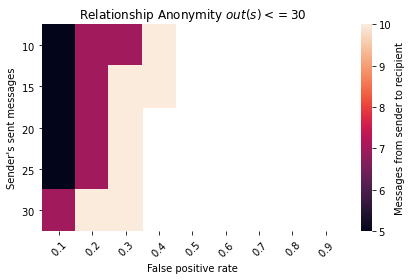

In [127]:
y_axis_labels = ["$30$","$25$","$20$","$15$","$10$"]
y_axis_labels.reverse()
##x_axis_labels = [2**(i+1) for i in range(0,19)]
#y_axis_labels = [math.pow(2,-(i)) for i in range(1,10)]
x_axis_labels = ["$0.1$", "$0.2$", "$0.3$", "$0.4$", "$0.5$", "$0.6$", "$0.7$", "$0.8$","$0.9$"]
ax = sns.heatmap(detectableMsgs,  mask=detectableMsgs < 1,xticklabels=x_axis_labels, yticklabels = y_axis_labels, cbar_kws={'label': 'Messages from sender to recipient'})
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
ax.set_title('Relationship Anonymity $out(s)<=30$')
plt.xlabel("False positive rate")
plt.ylabel("Sender's sent messages")
plt.tight_layout()
plt.savefig("relationshipAnonymity2.pdf")
plt.show()

In [178]:
## Adding false positive rates to the recipients!
G.nodes['2']['falsePos']=0.1454

In [4]:
## Setting randomly false positive rates to FMD users!
falsePositiveRates = [pow(2,-k) for k in range(1,8)]
for u in tqdm(G.nodes):
    randIndex = random.randint(0,len(falsePositiveRates)-1)
    G.nodes[u]['falsePos']=falsePositiveRates[randIndex]

  0%|          | 0/1899 [00:00<?, ?it/s]

In [6]:
#coverG.clear()
coverG = G.copy() ##this graph will contain all the "cover" edges thanks to FMD according to recipients' false positive rates
print(G.nodes['5'])

{'falsePos': 1}


In [7]:
for msg in tqdm(G.edges):
    for recipient in G.nodes()-msg[1]: ##for the original recipient we already have an edge in the cover graph
        recFalsePos = G.nodes[recipient]['falsePos']
        #randNum = random.uniform(0, 1)
        randNum = np.random.uniform(0,1)
        if randNum <= recFalsePos:
            coverG.add_edge(msg[0],recipient,weight=1996)
    

  0%|          | 0/59835 [00:00<?, ?it/s]

In [8]:
print("Number of nodes : ", coverG.order())
print("Number of edges: ", coverG.size())
print("Density of the transaction graph: ",nx.classes.function.density(coverG))

Number of nodes :  1899
Number of edges:  113528738
Density of the transaction graph:  31.49812030179491


In [9]:
##Let's uncover the social graph using statistical tests (Z- and t-tests)!
##Relationship anonymity analysis
##Hereby we assume the server knows the number of sent messages per users.
##This is the case when FMD is deployed without an additional layer of anonymous communication system (e.g. Tor)
relevants = 0
truePositives = 0
trueNegatives = 0
falseNegatives = 0
falsePositives = 0
for u in tqdm(G.nodes):     
    allLinks = coverG.out_degree(u)
    neighbors = list(coverG.neighbors(u)) ##this is the neighbors the server sees
    for v in neighbors:
        flags = coverG.number_of_edges(u,v)
        p = G.nodes[v]['falsePos']
        mu0 = G.out_degree(u)*p ##in the paper we also call this ideal rate
        s = math.sqrt(G.out_degree(u)*p*(1-p))
        z = (flags-mu0)/s
        relatedNodes = False 
        if 30 < G.out_degree(u):
            p_values = scipy.stats.norm.sf(abs(z))*2
        else: 
            p_values = scipy.stats.t.sf(np.abs(z), G.out_degree(u)-1)*2 ##t-test
        if p_values < 0.01:
            relevants+=1
            if 0 < G.number_of_edges(u,v):
                relatedNodes = True
                truePositives+=1
            else:
                falseNegatives+=1
        else:
            if 0==G.number_of_edges(u,v):
                trueNegatives+=1
            else:
                falsePositives+=1 
                relatedNodes = True
                #print("Node",u," and node ",v," are connected: ",relatedNodes, mu0,flags,p_values,p,G.number_of_edges(u,v))
print("Precision:",truePositives/(truePositives+falsePositives))
print("Recall:",truePositives/(truePositives+falseNegatives))
print(truePositives, falsePositives, trueNegatives, falseNegatives)
print("Number of irrelevants:",relevants)

  0%|          | 0/1899 [00:00<?, ?it/s]

Precision: 0.18141505715411904
Recall: 0.1453382805715639
3682 16614 1394619 21652
Number of irrelevants: 25334


In [184]:
## College results
## Precision: 0.1692057942057942
## Recall: 0.19295122819508723
## Number of nodes :  1899
## Number of messages : 59835
## Density of the message graph:  0.016600995144136092
## Number of "cover" edges:  16095322
## Density of the cover message graph:  4.4655864020273555
## Number of edges:  16354849
## Density of the transaction graph:  4.537591189639492

## College results with t-tests
## Precision: 0.18141505715411904
## Recall: 0.1453382805715639
## TP: 3682 FP: 16614 TN: 1394619 FN: 21652
## Number of relevants: 25334

## EU results
## Precision: 0.22809780356402817
## Recall: 0.41361689336439467
## Number of nodes :  986
## Number of messages: 332334
## Number of cover edges:  47708341
## Density of the cover message graph:  49.12258008051812
## TP:5504 FP:18626 TN:537578 FN:7803
## Number of irrelevants: 369

## EU results with t-tests
## Precision: 0.2294115287416262
## Recall: 0.39184652278177456
## TP:5719 FP:19210 TN:619865 FN:8876
## Number of relevants: 14595

In [11]:
print(3682+16614+1394619+21652)

1436567


In [15]:
H = nx.Graph(G)
print(len(list(H.edges)))

13838


In [13]:
##Let's build the message vs recipient bipartite graph!

59835


In [68]:
## Temporal Uniformity of Detection
## We build the graph edge by edge adding also the cover (fuzzy edges) and try to detect True Positives!
G.clear()
#file1 = open('../../datasets/CollegeMsg.txt', 'r')
file1 = open('../../datasets/email-Eu-core-temporal.txt','r')
Lines = file1.readlines()

G = nx.MultiDiGraph() ## this is the graph with also the "cover/fuzzy" edges
H = nx.MultiDiGraph() ## this is the graph that only contains the edges of the real messages

minFp = 8
falsePositiveRates = [pow(2,-k) for k in range(1,minFp)]
msgCount = 0
truePositivesDetectionRates = []
truePositivesDegrees = []
falsePositivesDetectionRates = []
falsePositivesDegrees = []
truePositives = 0
trueNegatives = 0
falseNegatives = 0
falsePositives = 0
for line in tqdm(Lines):
    msgCount += 1
    myLine = line.split(',')
    if myLine[0] not in G:
        randIndex = random.randint(0,len(falsePositiveRates)-1)
        G.add_node(myLine[0],falsePos=falsePositiveRates[randIndex])
        H.add_node(myLine[0])
    if myLine[1] not in G:
        randIndex = random.randint(0,len(falsePositiveRates)-1)
        G.add_node(myLine[1],falsePos=falsePositiveRates[randIndex])
        H.add_node(myLine[1])
    G.add_edge(myLine[0],myLine[1], weight=myLine[2])
    H.add_edge(myLine[0],myLine[1], weight=myLine[2])
    ## do statistical testing for the recipient to see whether it received a true positive message!
    if msgCount >= 20000 and 25000 > msgCount:
        flags = G.in_degree(myLine[1])
        p = G.nodes[str(myLine[1])]['falsePos']
        mu0 = msgCount*p ##in the paper we also call this ideal rate
        s = math.sqrt(msgCount*p*(1-p))
        z = (flags-mu0)/s
        p_values = scipy.stats.norm.sf(abs(z))
        if p_values < 0.01:
            truePositives+=1
            truePositivesDetectionRates.append(p)
            truePositivesDegrees.append(H.degree(myLine[1]))
            #print("Yay",p,flags,myLine[1],truePositives)
        else:
            falseNegatives+=1    
    ## add cover edges probabilistically for all the other nodes for this message
    for u in G:
        if u!=myLine[0] and u!=myLine[1]:
            recFalsePos =G.nodes[str(u)]['falsePos']
            randNum = np.random.uniform(0,1)
            if randNum <= recFalsePos:
                G.add_edge(myLine[0],u,weight=1996)
                ##for every neighbor do statistical testing!
                if msgCount >= 20000 and 25000 > msgCount:
                    flags = G.in_degree(u)
                    p = G.nodes[str(u)]['falsePos']
                    mu0 = msgCount*p ##in the paper we also call this ideal rate
                    s = math.sqrt(msgCount*p*(1-p))
                    z = (flags-mu0)/s
                    p_values = scipy.stats.norm.sf(abs(z))
                    if p_values < 0.01:
                        falsePositives+=1
                        falsePositivesDetectionRates.append(p)
                        falsePositivesDegrees.append(H.degree(u))
                    else:
                        trueNegatives+=1
    if msgCount % 100 == 0:
        print(msgCount,truePositives,falsePositives,trueNegatives,falseNegatives)     
    
    

  0%|          | 0/332334 [00:00<?, ?it/s]

100 0 0 0 0
200 0 0 0 0
300 0 0 0 0
400 0 0 0 0
500 0 0 0 0
600 0 0 0 0
700 0 0 0 0
800 0 0 0 0
900 0 0 0 0
1000 0 0 0 0
1100 0 0 0 0
1200 0 0 0 0
1300 0 0 0 0
1400 0 0 0 0
1500 0 0 0 0
1600 0 0 0 0
1700 0 0 0 0
1800 0 0 0 0
1900 0 0 0 0
2000 0 0 0 0
2100 0 0 0 0
2200 0 0 0 0
2300 0 0 0 0
2400 0 0 0 0
2500 0 0 0 0
2600 0 0 0 0
2700 0 0 0 0
2800 0 0 0 0
2900 0 0 0 0
3000 0 0 0 0
3100 0 0 0 0
3200 0 0 0 0
3300 0 0 0 0
3400 0 0 0 0
3500 0 0 0 0
3600 0 0 0 0
3700 0 0 0 0
3800 0 0 0 0
3900 0 0 0 0
4000 0 0 0 0
4100 0 0 0 0
4200 0 0 0 0
4300 0 0 0 0
4400 0 0 0 0
4500 0 0 0 0
4600 0 0 0 0
4700 0 0 0 0
4800 0 0 0 0
4900 0 0 0 0
5000 0 0 0 0
5100 0 0 0 0
5200 0 0 0 0
5300 0 0 0 0
5400 0 0 0 0
5500 0 0 0 0
5600 0 0 0 0
5700 0 0 0 0
5800 0 0 0 0
5900 0 0 0 0
6000 0 0 0 0
6100 0 0 0 0
6200 0 0 0 0
6300 0 0 0 0
6400 0 0 0 0
6500 0 0 0 0
6600 0 0 0 0
6700 0 0 0 0
6800 0 0 0 0
6900 0 0 0 0
7000 0 0 0 0
7100 0 0 0 0
7200 0 0 0 0
7300 0 0 0 0
7400 0 0 0 0
7500 0 0 0 0
7600 0 0 0 0
7700 0 0 0 0
7800 0 0

38800 2313 277592 204465 2687
38900 2313 277592 204465 2687
39000 2313 277592 204465 2687
39100 2313 277592 204465 2687
39200 2313 277592 204465 2687
39300 2313 277592 204465 2687
39400 2313 277592 204465 2687
39500 2313 277592 204465 2687
39600 2313 277592 204465 2687
39700 2313 277592 204465 2687
39800 2313 277592 204465 2687
39900 2313 277592 204465 2687
40000 2313 277592 204465 2687
40100 2313 277592 204465 2687
40200 2313 277592 204465 2687
40300 2313 277592 204465 2687
40400 2313 277592 204465 2687
40500 2313 277592 204465 2687
40600 2313 277592 204465 2687
40700 2313 277592 204465 2687
40800 2313 277592 204465 2687
40900 2313 277592 204465 2687
41000 2313 277592 204465 2687
41100 2313 277592 204465 2687
41200 2313 277592 204465 2687
41300 2313 277592 204465 2687
41400 2313 277592 204465 2687
41500 2313 277592 204465 2687
41600 2313 277592 204465 2687
41700 2313 277592 204465 2687
41800 2313 277592 204465 2687
41900 2313 277592 204465 2687
42000 2313 277592 204465 2687
42100 2313

66200 2313 277592 204465 2687
66300 2313 277592 204465 2687
66400 2313 277592 204465 2687
66500 2313 277592 204465 2687
66600 2313 277592 204465 2687
66700 2313 277592 204465 2687
66800 2313 277592 204465 2687
66900 2313 277592 204465 2687
67000 2313 277592 204465 2687
67100 2313 277592 204465 2687
67200 2313 277592 204465 2687
67300 2313 277592 204465 2687
67400 2313 277592 204465 2687
67500 2313 277592 204465 2687
67600 2313 277592 204465 2687
67700 2313 277592 204465 2687
67800 2313 277592 204465 2687
67900 2313 277592 204465 2687
68000 2313 277592 204465 2687
68100 2313 277592 204465 2687
68200 2313 277592 204465 2687
68300 2313 277592 204465 2687
68400 2313 277592 204465 2687
68500 2313 277592 204465 2687
68600 2313 277592 204465 2687
68700 2313 277592 204465 2687
68800 2313 277592 204465 2687
68900 2313 277592 204465 2687
69000 2313 277592 204465 2687
69100 2313 277592 204465 2687
69200 2313 277592 204465 2687
69300 2313 277592 204465 2687
69400 2313 277592 204465 2687
69500 2313

93600 2313 277592 204465 2687
93700 2313 277592 204465 2687
93800 2313 277592 204465 2687
93900 2313 277592 204465 2687
94000 2313 277592 204465 2687
94100 2313 277592 204465 2687
94200 2313 277592 204465 2687
94300 2313 277592 204465 2687
94400 2313 277592 204465 2687
94500 2313 277592 204465 2687
94600 2313 277592 204465 2687
94700 2313 277592 204465 2687
94800 2313 277592 204465 2687
94900 2313 277592 204465 2687
95000 2313 277592 204465 2687
95100 2313 277592 204465 2687
95200 2313 277592 204465 2687
95300 2313 277592 204465 2687
95400 2313 277592 204465 2687
95500 2313 277592 204465 2687
95600 2313 277592 204465 2687
95700 2313 277592 204465 2687
95800 2313 277592 204465 2687
95900 2313 277592 204465 2687
96000 2313 277592 204465 2687
96100 2313 277592 204465 2687
96200 2313 277592 204465 2687
96300 2313 277592 204465 2687
96400 2313 277592 204465 2687
96500 2313 277592 204465 2687
96600 2313 277592 204465 2687
96700 2313 277592 204465 2687
96800 2313 277592 204465 2687
96900 2313

120300 2313 277592 204465 2687
120400 2313 277592 204465 2687
120500 2313 277592 204465 2687
120600 2313 277592 204465 2687
120700 2313 277592 204465 2687
120800 2313 277592 204465 2687
120900 2313 277592 204465 2687
121000 2313 277592 204465 2687
121100 2313 277592 204465 2687
121200 2313 277592 204465 2687
121300 2313 277592 204465 2687
121400 2313 277592 204465 2687
121500 2313 277592 204465 2687
121600 2313 277592 204465 2687
121700 2313 277592 204465 2687
121800 2313 277592 204465 2687
121900 2313 277592 204465 2687
122000 2313 277592 204465 2687
122100 2313 277592 204465 2687
122200 2313 277592 204465 2687
122300 2313 277592 204465 2687
122400 2313 277592 204465 2687
122500 2313 277592 204465 2687
122600 2313 277592 204465 2687
122700 2313 277592 204465 2687
122800 2313 277592 204465 2687
122900 2313 277592 204465 2687
123000 2313 277592 204465 2687
123100 2313 277592 204465 2687
123200 2313 277592 204465 2687
123300 2313 277592 204465 2687
123400 2313 277592 204465 2687
123500 2

146800 2313 277592 204465 2687
146900 2313 277592 204465 2687
147000 2313 277592 204465 2687
147100 2313 277592 204465 2687
147200 2313 277592 204465 2687
147300 2313 277592 204465 2687
147400 2313 277592 204465 2687
147500 2313 277592 204465 2687
147600 2313 277592 204465 2687
147700 2313 277592 204465 2687
147800 2313 277592 204465 2687
147900 2313 277592 204465 2687
148000 2313 277592 204465 2687
148100 2313 277592 204465 2687
148200 2313 277592 204465 2687
148300 2313 277592 204465 2687
148400 2313 277592 204465 2687
148500 2313 277592 204465 2687
148600 2313 277592 204465 2687
148700 2313 277592 204465 2687
148800 2313 277592 204465 2687
148900 2313 277592 204465 2687
149000 2313 277592 204465 2687
149100 2313 277592 204465 2687
149200 2313 277592 204465 2687
149300 2313 277592 204465 2687
149400 2313 277592 204465 2687
149500 2313 277592 204465 2687
149600 2313 277592 204465 2687
149700 2313 277592 204465 2687
149800 2313 277592 204465 2687
149900 2313 277592 204465 2687
150000 2

173300 2313 277592 204465 2687
173400 2313 277592 204465 2687
173500 2313 277592 204465 2687
173600 2313 277592 204465 2687
173700 2313 277592 204465 2687
173800 2313 277592 204465 2687
173900 2313 277592 204465 2687
174000 2313 277592 204465 2687
174100 2313 277592 204465 2687
174200 2313 277592 204465 2687
174300 2313 277592 204465 2687
174400 2313 277592 204465 2687
174500 2313 277592 204465 2687
174600 2313 277592 204465 2687
174700 2313 277592 204465 2687
174800 2313 277592 204465 2687
174900 2313 277592 204465 2687
175000 2313 277592 204465 2687
175100 2313 277592 204465 2687
175200 2313 277592 204465 2687
175300 2313 277592 204465 2687
175400 2313 277592 204465 2687
175500 2313 277592 204465 2687
175600 2313 277592 204465 2687
175700 2313 277592 204465 2687
175800 2313 277592 204465 2687
175900 2313 277592 204465 2687
176000 2313 277592 204465 2687
176100 2313 277592 204465 2687
176200 2313 277592 204465 2687
176300 2313 277592 204465 2687
176400 2313 277592 204465 2687
176500 2

199800 2313 277592 204465 2687
199900 2313 277592 204465 2687
200000 2313 277592 204465 2687
200100 2313 277592 204465 2687
200200 2313 277592 204465 2687
200300 2313 277592 204465 2687
200400 2313 277592 204465 2687
200500 2313 277592 204465 2687
200600 2313 277592 204465 2687
200700 2313 277592 204465 2687
200800 2313 277592 204465 2687
200900 2313 277592 204465 2687
201000 2313 277592 204465 2687
201100 2313 277592 204465 2687
201200 2313 277592 204465 2687
201300 2313 277592 204465 2687
201400 2313 277592 204465 2687
201500 2313 277592 204465 2687
201600 2313 277592 204465 2687
201700 2313 277592 204465 2687
201800 2313 277592 204465 2687
201900 2313 277592 204465 2687
202000 2313 277592 204465 2687
202100 2313 277592 204465 2687
202200 2313 277592 204465 2687
202300 2313 277592 204465 2687
202400 2313 277592 204465 2687
202500 2313 277592 204465 2687
202600 2313 277592 204465 2687
202700 2313 277592 204465 2687
202800 2313 277592 204465 2687
202900 2313 277592 204465 2687
203000 2

226300 2313 277592 204465 2687
226400 2313 277592 204465 2687
226500 2313 277592 204465 2687
226600 2313 277592 204465 2687
226700 2313 277592 204465 2687
226800 2313 277592 204465 2687
226900 2313 277592 204465 2687
227000 2313 277592 204465 2687
227100 2313 277592 204465 2687
227200 2313 277592 204465 2687
227300 2313 277592 204465 2687
227400 2313 277592 204465 2687
227500 2313 277592 204465 2687
227600 2313 277592 204465 2687
227700 2313 277592 204465 2687
227800 2313 277592 204465 2687
227900 2313 277592 204465 2687
228000 2313 277592 204465 2687
228100 2313 277592 204465 2687
228200 2313 277592 204465 2687
228300 2313 277592 204465 2687
228400 2313 277592 204465 2687
228500 2313 277592 204465 2687
228600 2313 277592 204465 2687
228700 2313 277592 204465 2687
228800 2313 277592 204465 2687
228900 2313 277592 204465 2687
229000 2313 277592 204465 2687
229100 2313 277592 204465 2687
229200 2313 277592 204465 2687
229300 2313 277592 204465 2687
229400 2313 277592 204465 2687
229500 2

252800 2313 277592 204465 2687
252900 2313 277592 204465 2687
253000 2313 277592 204465 2687
253100 2313 277592 204465 2687
253200 2313 277592 204465 2687
253300 2313 277592 204465 2687
253400 2313 277592 204465 2687
253500 2313 277592 204465 2687
253600 2313 277592 204465 2687
253700 2313 277592 204465 2687
253800 2313 277592 204465 2687
253900 2313 277592 204465 2687
254000 2313 277592 204465 2687
254100 2313 277592 204465 2687
254200 2313 277592 204465 2687
254300 2313 277592 204465 2687
254400 2313 277592 204465 2687
254500 2313 277592 204465 2687
254600 2313 277592 204465 2687
254700 2313 277592 204465 2687
254800 2313 277592 204465 2687
254900 2313 277592 204465 2687
255000 2313 277592 204465 2687
255100 2313 277592 204465 2687
255200 2313 277592 204465 2687
255300 2313 277592 204465 2687
255400 2313 277592 204465 2687
255500 2313 277592 204465 2687
255600 2313 277592 204465 2687
255700 2313 277592 204465 2687
255800 2313 277592 204465 2687
255900 2313 277592 204465 2687
256000 2

279300 2313 277592 204465 2687
279400 2313 277592 204465 2687
279500 2313 277592 204465 2687
279600 2313 277592 204465 2687
279700 2313 277592 204465 2687
279800 2313 277592 204465 2687
279900 2313 277592 204465 2687
280000 2313 277592 204465 2687
280100 2313 277592 204465 2687
280200 2313 277592 204465 2687
280300 2313 277592 204465 2687
280400 2313 277592 204465 2687
280500 2313 277592 204465 2687
280600 2313 277592 204465 2687
280700 2313 277592 204465 2687
280800 2313 277592 204465 2687
280900 2313 277592 204465 2687
281000 2313 277592 204465 2687
281100 2313 277592 204465 2687
281200 2313 277592 204465 2687
281300 2313 277592 204465 2687
281400 2313 277592 204465 2687
281500 2313 277592 204465 2687
281600 2313 277592 204465 2687
281700 2313 277592 204465 2687
281800 2313 277592 204465 2687
281900 2313 277592 204465 2687
282000 2313 277592 204465 2687
282100 2313 277592 204465 2687
282200 2313 277592 204465 2687
282300 2313 277592 204465 2687
282400 2313 277592 204465 2687
282500 2

305800 2313 277592 204465 2687
305900 2313 277592 204465 2687
306000 2313 277592 204465 2687
306100 2313 277592 204465 2687
306200 2313 277592 204465 2687
306300 2313 277592 204465 2687
306400 2313 277592 204465 2687
306500 2313 277592 204465 2687
306600 2313 277592 204465 2687
306700 2313 277592 204465 2687
306800 2313 277592 204465 2687
306900 2313 277592 204465 2687
307000 2313 277592 204465 2687
307100 2313 277592 204465 2687
307200 2313 277592 204465 2687
307300 2313 277592 204465 2687
307400 2313 277592 204465 2687
307500 2313 277592 204465 2687
307600 2313 277592 204465 2687
307700 2313 277592 204465 2687
307800 2313 277592 204465 2687
307900 2313 277592 204465 2687
308000 2313 277592 204465 2687
308100 2313 277592 204465 2687
308200 2313 277592 204465 2687
308300 2313 277592 204465 2687
308400 2313 277592 204465 2687
308500 2313 277592 204465 2687
308600 2313 277592 204465 2687
308700 2313 277592 204465 2687
308800 2313 277592 204465 2687
308900 2313 277592 204465 2687
309000 2

KeyboardInterrupt: 

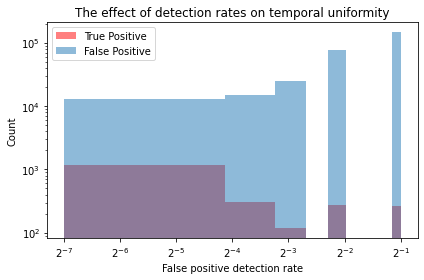

<Figure size 432x288 with 0 Axes>

In [67]:
plt.hist(truePositivesDetectionRates, color='r', alpha=0.5, label='True Positive')
plt.hist(falsePositivesDetectionRates, alpha=0.5, label='False Positive')
plt.xscale('log',base=2)
plt.yscale('log',base=10)
plt.xlabel('False positive detection rate')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.title("The effect of detection rates on temporal uniformity")
plt.tight_layout()
plt.show()
plt.savefig('temporalUniformityDetectionRates.pdf')

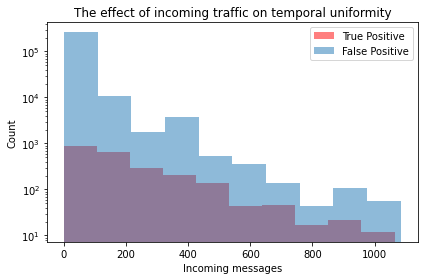

<Figure size 432x288 with 0 Axes>

In [76]:
plt.hist(truePositivesDegrees, color='r', alpha=0.5, label='True Positive')
plt.hist(falsePositivesDegrees, alpha=0.5, label='False Positive')
#plt.xscale('log',base=10)
plt.yscale('log',base=10)
plt.xlabel('Incoming messages')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title("The effect of incoming traffic on temporal uniformity")
plt.tight_layout()
plt.show()
plt.savefig('temporalUniformityDegrees.pdf')

In [112]:
##Detection ambiguity and temporal uniformity of detection
allMessages = [1000,10000,100000,1000000,10000000]
sentOutMsgs = [10,20,30,40,50,60,70,80,90,100]
maxSentMessages = 100
detectableTrueMsgs = np.zeros((len(allMessages),len(sentOutMsgs)))
for N in allMessages:
    for m in sentOutMsgs:
        for p in np.arange(0.5,0,-0.001):
            sigma=math.sqrt(p*(1-p)*N)
            if 3*sigma < m:
                detectableTrueMsgs[allMessages.index(N)][sentOutMsgs.index(m)]=p
                break
print(detectableTrueMsgs) 

[[0.011 0.046 0.112 0.231 0.5   0.5   0.5   0.5   0.5   0.5  ]
 [0.001 0.004 0.01  0.018 0.028 0.041 0.057 0.077 0.1   0.127]
 [0.    0.    0.001 0.001 0.002 0.004 0.005 0.007 0.009 0.011]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.001]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]]


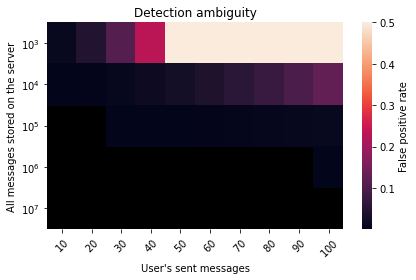

In [118]:
y_axis_labels = ["$10^3$","$10^4$","$10^5$","$10^6$","$10^7$"]
##x_axis_labels = [2**(i+1) for i in range(0,19)]
#y_axis_labels = [math.pow(2,-(i)) for i in range(1,10)]
x_axis_labels = ["$10$", "$20$", "$30$", "$40$", "$50$", "$60$", "$70$","$80$","$90$","$100$"]
ax = sns.heatmap(detectableTrueMsgs,  mask=detectableTrueMsgs < 0.00001,xticklabels=x_axis_labels, yticklabels = y_axis_labels, cbar_kws={'label': 'False positive rate'})
ax.set_facecolor('xkcd:black')
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
ax.set_title('Detection ambiguity')
plt.ylabel("All messages stored on the server")
plt.xlabel("User's sent messages")
plt.tight_layout()
plt.savefig("detectionAmbiguity.pdf")
plt.show()

In [110]:
print(1/1024)

0.0009765625
